In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [3]:
# Read the CSV files into Dataframe

whale_path = Path('C:/Users/adria/OneDrive/Desktop/Fintech Bootcamp/Homework/Unit-4-Homework-Assignment-A-Whale-Off-the-Port-Folio-/Resources/whale_returns.csv')
algo_path = Path('C:/Users/adria/OneDrive/Desktop/Fintech Bootcamp/Homework/Unit-4-Homework-Assignment-A-Whale-Off-the-Port-Folio-/Resources/algo_returns.csv')
sp_tsx_path = Path('C:/Users/adria/OneDrive/Desktop/Fintech Bootcamp/Homework/Unit-4-Homework-Assignment-A-Whale-Off-the-Port-Folio-/Resources/sp_tsx_history.csv')


In [4]:
# Whale Returns

# Reading Whale returns
whale_df = pd.read_csv(whale_path,parse_dates=True, infer_datetime_format=True)

In [5]:
# Count Nulls
whale_df.isnull().mean()*100

Date                           0.00000
SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [6]:
# Drop Nulls
whale_df = whale_df.dropna().copy()

# Check if nulls are still here
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
whale_df = whale_df.set_index("Date")

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [9]:
# Algorithmic Daily Returns

algo_df = pd.read_csv(algo_path, parse_dates=True, infer_datetime_format=True)

In [10]:
# Count Nulls
algo_df.isnull().mean()*100

Date      0.000000
Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [11]:
# Drop Nulls
algo_df = algo_df.dropna().copy()

# Check if nulls is still there
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [17]:
# Set Date to be index
algo_df = algo_df.set_index("Date")

algo_df

KeyError: "None of ['Date'] are in the columns"

In [19]:
# S&P TSX 60 Returns

sp_tst_df = pd.read_csv(sp_tsx_path, parse_dates=True, infer_datetime_format=True)

In [20]:
# Check Data type
sp_tst_df.dtypes

Date     object
Close    object
dtype: object

In [21]:
sp_tst_df

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"
...,...,...
1813,20-Dec-2019,"$17,118.44"
1814,23-Dec-2019,"$17,128.71"
1815,24-Dec-2019,"$17,180.15"
1816,27-Dec-2019,"$17,168.21"


In [22]:
# Remove $ sign
sp_tst_df["Close"] = sp_tst_df["Close"].str.replace("$","")

C:\Users\adria\AppData\Local\Temp\ipykernel_14388\1889039867.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tst_df["Close"] = sp_tst_df["Close"].str.replace("$","")


In [23]:
# Remove , sign
sp_tst_df["Close"] = sp_tst_df["Close"].str.replace(",","")

In [24]:
# Change Data Type from string to float

sp_tst_df["Close"] = sp_tst_df["Close"].astype(float)

In [25]:
# Check Data Type
sp_tst_df.dtypes

Date      object
Close    float64
dtype: object

In [27]:
sp_tst_df = sp_tst_df.set_index("Date")
sp_tst_df

,Close
Date,
1-Oct-2012,12370.19
2-Oct-2012,12391.23
3-Oct-2012,12359.47
4-Oct-2012,12447.68
5-Oct-2012,12418.99
...,...
20-Dec-2019,17118.44
23-Dec-2019,17128.71
24-Dec-2019,17180.15


In [29]:
# Calculate Daily Return
sp_tst_return = sp_tst_df.pct_change().dropna().copy()
sp_tst_return

,Close
Date,
2-Oct-2012,0.001701
3-Oct-2012,-0.002563
4-Oct-2012,0.007137
5-Oct-2012,-0.002305
9-Oct-2012,-0.011709
...,...
20-Dec-2019,0.003188
23-Dec-2019,0.000600
24-Dec-2019,0.003003


In [30]:
# Change column Close to S&P TSX

columns = ["S&P TST"]
sp_tst_return.columns = columns
sp_tst_return

,S&P TST
Date,
2-Oct-2012,0.001701
3-Oct-2012,-0.002563
4-Oct-2012,0.007137
5-Oct-2012,-0.002305
9-Oct-2012,-0.011709
...,...
20-Dec-2019,0.003188
23-Dec-2019,0.000600
24-Dec-2019,0.003003


In [32]:
# Check Null
sp_tst_return.isnull().mean()*100

S&P TST    0.0
dtype: float64

In [36]:
# Concat all into one dataframe
combine_df = pd.concat([whale_df, algo_df, sp_tst_return], axis="columns", join="outer")

combine_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TST
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,NaN


<AxesSubplot:title={'center':'Whale Porfolio Return'}, xlabel='Date'>

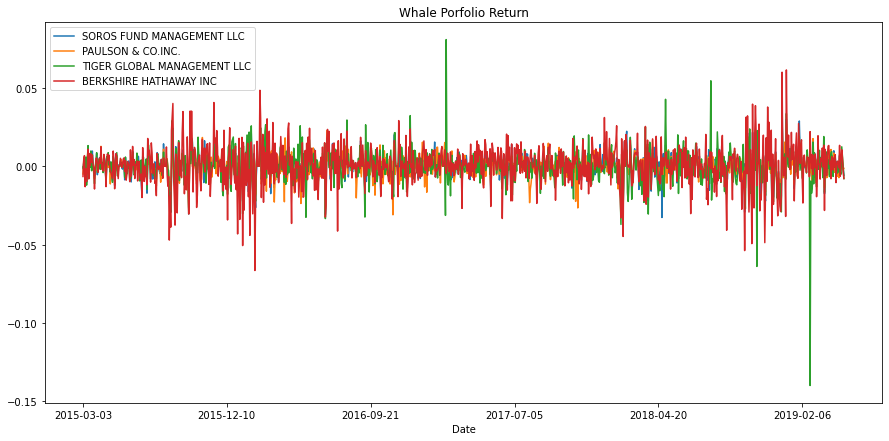

In [43]:
# Plot Daily Returns for all Porfolio

# Whale Return

whale_df.plot(title="Whale Porfolio Return", figsize=(15,7))

<AxesSubplot:title={'center':'Algo Portolio Return'}, xlabel='Date'>

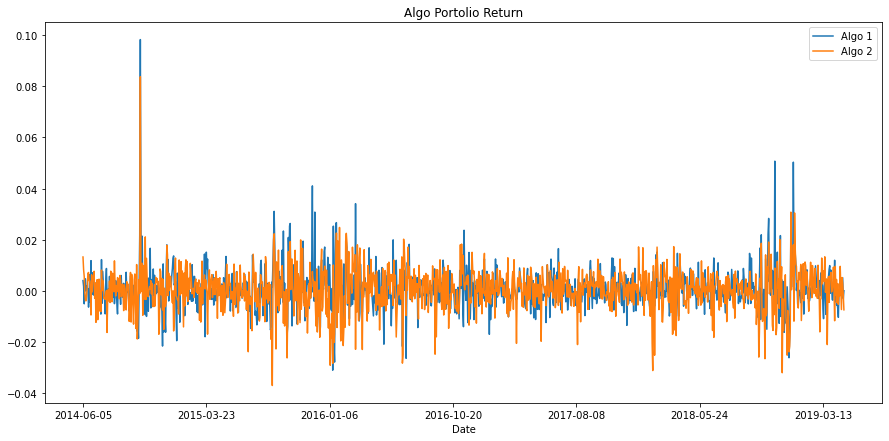

In [44]:
# Algo Return

algo_df.plot(title="Algo Portolio Return", figsize=(15,7))

<AxesSubplot:title={'center':'S&P TST Porfolio Return'}, xlabel='Date'>

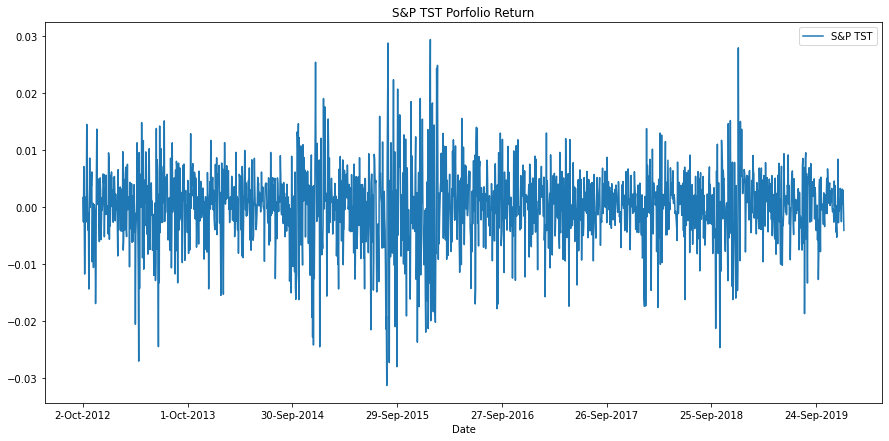

In [45]:
# S&P TST Return

sp_tst_return.plot(title="S&P TST Porfolio Return", figsize=(15,7))

<AxesSubplot:title={'center':'Whale Cummulative Return'}, xlabel='Date'>

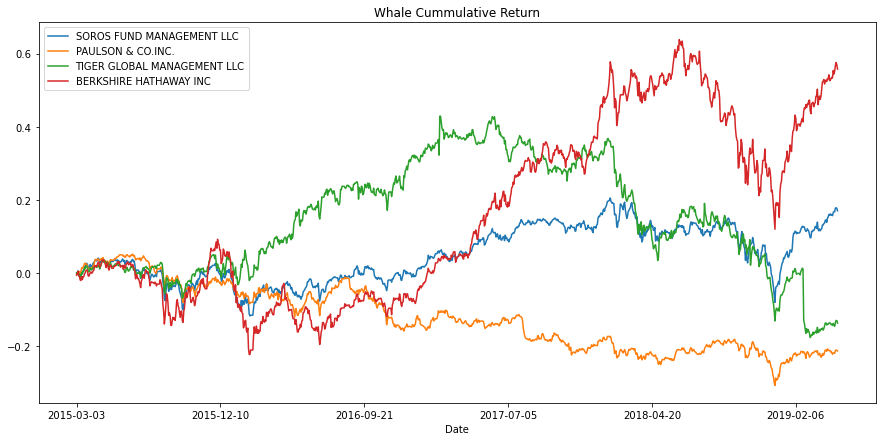

In [48]:
# Caculate cumulative returns for each porfolio

# Whale Cummulative Return
whale_cum_return = (1 + whale_df).cumprod() - 1
whale_cum_return.plot(title="Whale Cummulative Return", figsize=(15,7))

<AxesSubplot:title={'center':'Algo Cummulative Return'}, xlabel='Date'>

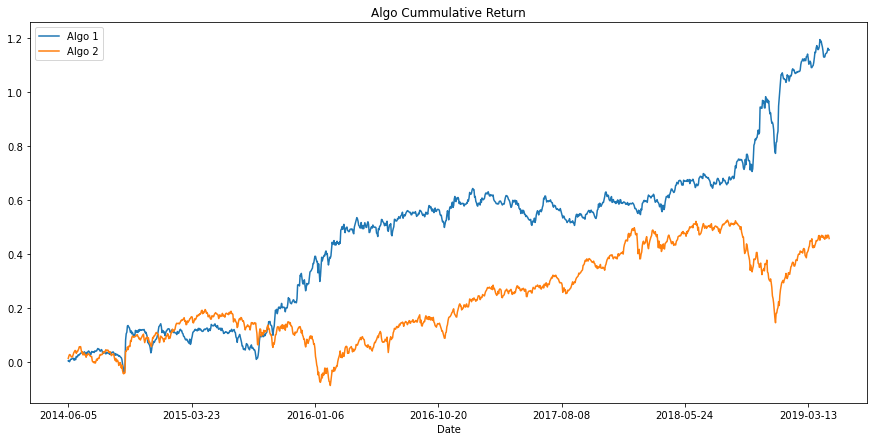

In [49]:
# Algo Cummulative Return

algo_cum_return = (1 + algo_df).cumprod() - 1
algo_cum_return.plot(title="Algo Cummulative Return", figsize=(15,7))

<AxesSubplot:title={'center':'S&P Cummulative Return'}, xlabel='Date'>

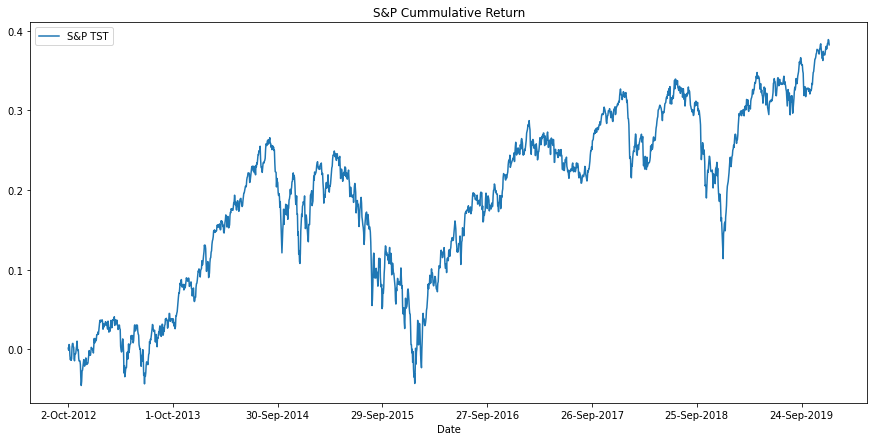

In [50]:
# S&P Cummulative Return

sp_cum_return = (1 + sp_tst_return).cumprod() - 1
sp_cum_return.plot(title="S&P Cummulative Return", figsize=(15,7))

<AxesSubplot:>

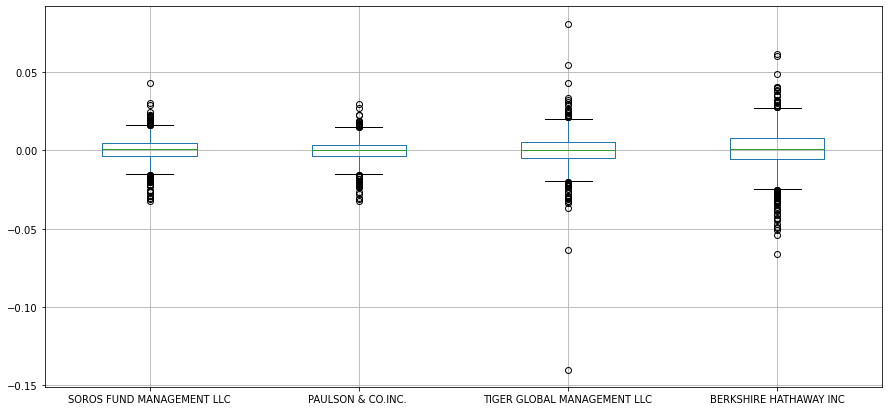

In [54]:
# Whale boxplot
whale_df.boxplot(figsize=(15,7))

<AxesSubplot:>

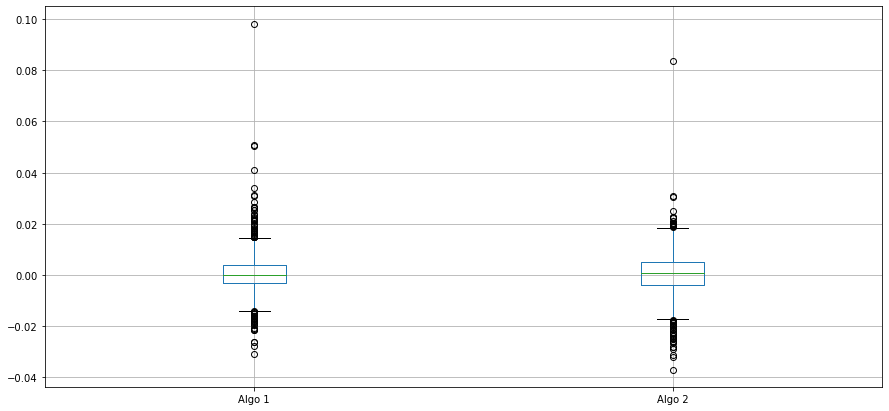

In [55]:
# Algo boxplot
algo_df.boxplot(figsize=(15,7))

<AxesSubplot:>

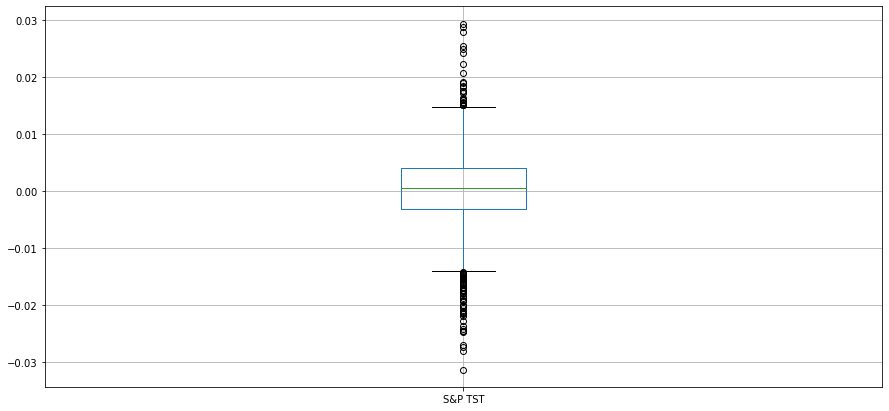

In [56]:
# SP TST boxplot
sp_tst_return.boxplot(figsize=(15,7))

In [61]:
# Calculate STD for each porfolio

whale_std = whale_df.std()


whale_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [62]:
algo_std = algo_df.std()
algo_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [63]:
sp_std = sp_tst_return.std()
sp_std

S&P TST    0.006637
dtype: float64

In [ ]:
# Determine which porfolio is riskier than the S&P 

# Since the higher the standard deviation represents higher risk, in this case, both whale and algo are riskier than S&P with all of them have a std greater than .006637

In [66]:
# Calulate the annualize std for each porfolio

annualized_whale_std = whale_std * np.sqrt(252)
annualized_algo_std = algo_std * np.sqrt(252)
annualized_sp_std = sp_std * np.sqrt(252)

print(f"Annualized Standard Deviation of Whale:\n{annualized_whale_std}")
print("-------------------------------------")
print(f"Annualized Standard Deviation of Algo:\n{annualized_algo_std}")
print("-------------------------------------")
print(f"Annualized Standard Deviation of S&P:\n{annualized_sp_std}")

Annualized Standard Deviation of Whale:
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64
-------------------------------------
Annualized Standard Deviation of Algo:
Algo 1    0.126801
Algo 2    0.134401
dtype: float64
-------------------------------------
Annualized Standard Deviation of S&P:
S&P TST    0.105365
dtype: float64


<AxesSubplot:xlabel='Date'>

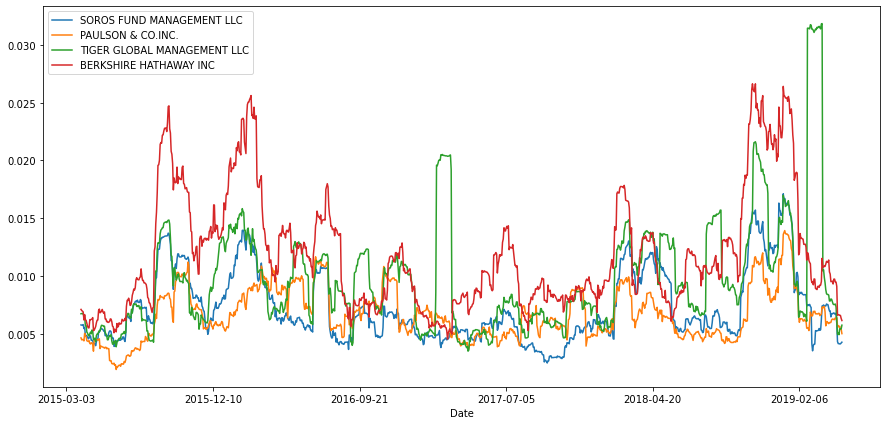

In [76]:
# Rolling standard deviation of all porfolio
whale_df.rolling(window=21).std().plot(figsize=(15,7))

<AxesSubplot:xlabel='Date'>

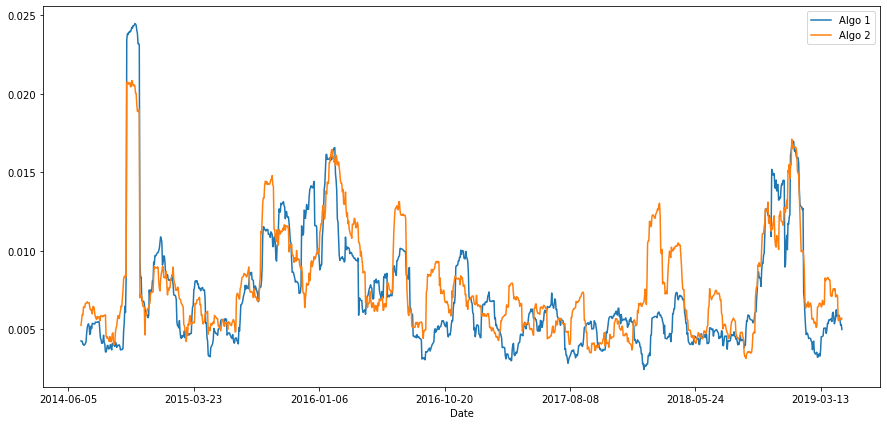

In [77]:
algo_df.rolling(window=21).std().plot(figsize=(15,7))

<AxesSubplot:xlabel='Date'>

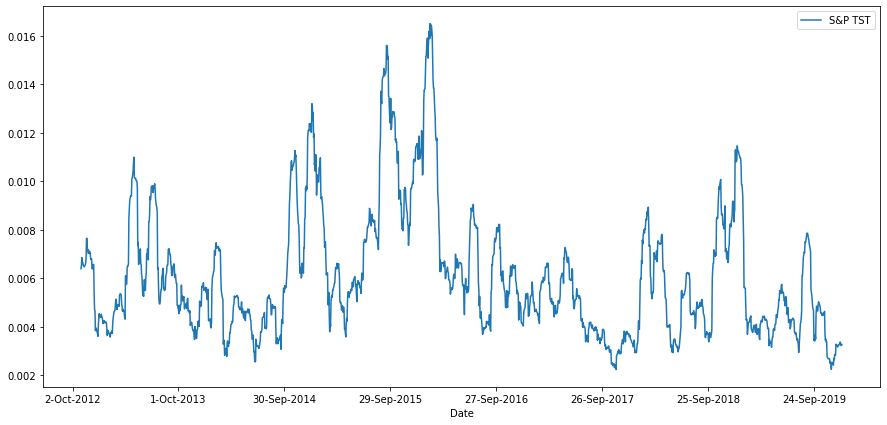

In [78]:
sp_tst_return.rolling(window=21).std().plot(figsize=(15,7))

In [81]:
# Calculate the correlation between each stock
import seaborn as sns
whale_cor = whale_df.corr()
whale_cor

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000


<AxesSubplot:>

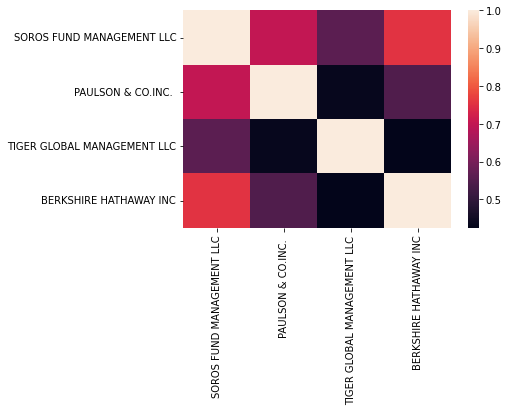

In [82]:
sns.heatmap(whale_cor)

In [83]:
algo_cor = algo_df.corr()
algo_cor

,Algo 1,Algo 2
Algo 1,1.000000,0.346568
Algo 2,0.346568,1.000000


<AxesSubplot:>

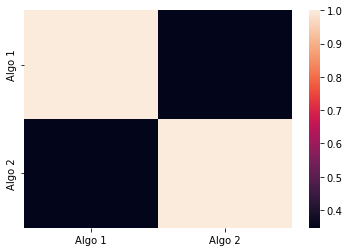

In [84]:
sns.heatmap(algo_cor)

In [85]:
sp_tst_return_cor = sp_tst_return.corr()
sp_tst_return_cor

,S&P TST
S&P TST,1.0
